In [2]:
# data link : https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv

# time_seires_2 md파일과 01. 데이터 안정성 보장 필요성 강의 참고

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

### Daily 데이터
    - 시계열 데이터 전처리
    - plot: 일별, 주별 (resample)
    - 월별 변동성 비교 (rolling)

In [3]:
df = pd.read_csv('./data/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [4]:
df.head()

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEXKOUS  1306 non-null   object
dtypes: object(1)
memory usage: 60.4+ KB


In [8]:
df.columns = ['KOUS']
df['KOUS'].replace('.', '', inplace=True)

In [18]:
df['KOUS'] = pd.to_numeric(df['KOUS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1251 non-null   float64
dtypes: float64(1)
memory usage: 60.4 KB


In [20]:
df['KOUS'].isnull().sum()

55

In [21]:
df['KOUS'].fillna(method='ffill', inplace=True) # 앞에있는걸로 채워넣어라

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 60.4 KB


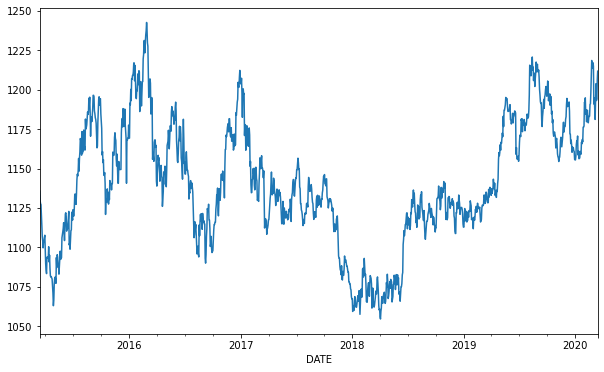

In [24]:
df['KOUS'].plot(figsize=(10, 6)) # 환율 그래프로 보기

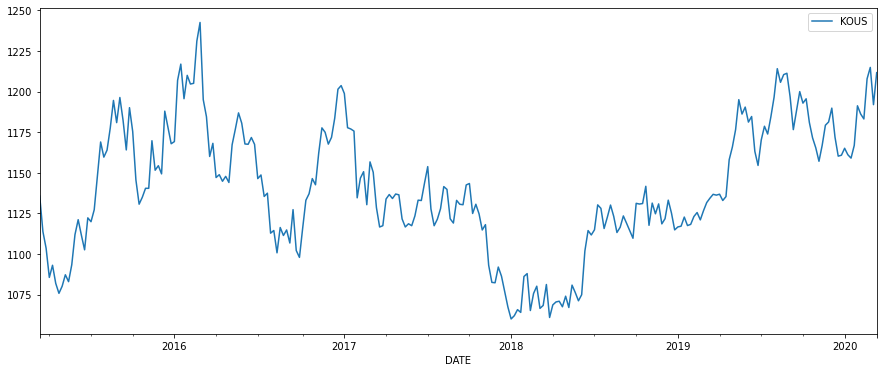

In [30]:
# resample : 일별 데이터 -> 주단위 데이터, 월단위 데이터로 변환
# 주-금요일
df.resample('W-Fri').last().plot(figsize=(15, 6))

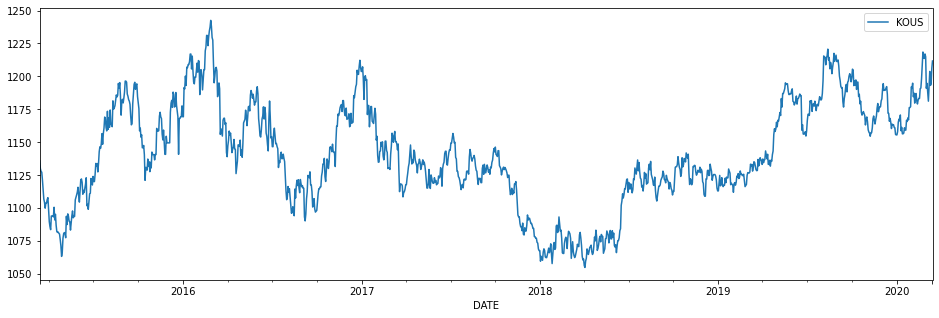

In [61]:
# rolling : 이전 xx일에 대한 이동 평균, 이동 sum을 산출 할 때 사용
# 이전 30일에 대한 mean
df[df.rolling(10)['KOUS'].mean() != np.NaN].plot(figsize=(16, 5))

# standard deviation 을 구할때 많이 씀, 표준편차

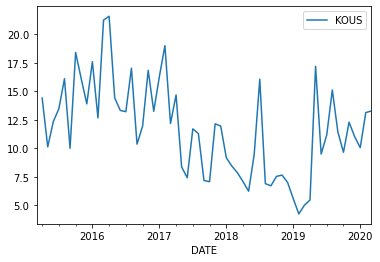

In [66]:
df.rolling(30).std().resample('M').mean().plot() # 매 월말 30일 마다 데이터 구함

# 안정성 검정 (ADF Test)
- 귀무가설 = 안정적이지 않다.
- p-value가 0.05보다 작으면, 귀무가설 기각, 즉 안정적인 시계열
- p-value가 0.05보다 크면, 귀무가설 채택, 즉, 불안정한 시계열
- 안정적인 데이터로 변경: 변화율 / 로그 차분

In [67]:
adfuller(df['KOUS'])
# 두번째 데이터가 pvalue, 안정적이지 않은 데이터

(-2.6235188039221238,
 0.08823317575724848,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '5%': -2.8637572934525286,
  '10%': -2.56795049999266},
 8358.34690710183)

안정적으로 변화할 때 증가율이나 로그 차분 사용

y(t+1) / y(t)-1
log(y(t+1))

In [69]:
adfuller(df.KOUS.pct_change().dropna())
# 이 값을 차분해서 사용해도 됨 

(-26.943541201332884,
 0.0,
 1,
 1303,
 {'1%': -3.435378572037035,
  '5%': -2.863760700696655,
  '10%': -2.56795231450063},
 -9698.633396210715)

In [71]:
df.KOUS.shift(1), df.KOUS # shift: 바로 직전 날의 데이터를 가져올 수 있음

(DATE
 2015-03-13        NaN
 2015-03-16    1135.70
 2015-03-17    1129.62
 2015-03-18    1127.69
 2015-03-19    1127.09
                ...   
 2020-03-09    1192.00
 2020-03-10    1203.75
 2020-03-11    1193.10
 2020-03-12    1194.16
 2020-03-13    1206.19
 Name: KOUS, Length: 1306, dtype: float64,
 DATE
 2015-03-13    1135.70
 2015-03-16    1129.62
 2015-03-17    1127.69
 2015-03-18    1127.09
 2015-03-19    1121.21
                ...   
 2020-03-09    1203.75
 2020-03-10    1193.10
 2020-03-11    1194.16
 2020-03-12    1206.19
 2020-03-13    1211.70
 Name: KOUS, Length: 1306, dtype: float64)